<a href="https://colab.research.google.com/github/walruto/fortnite_anaylsis/blob/main/Fortnite_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**Final Project: Fortnite Player Analysis**
- **Dataset**: Fortnte Players Stats
- **Source**: Kaggle
- **Why?**: I am a fortnite player and feel like I know more about this subject that anything else.
- **Research Question 1**: is the higher K/D directly related to the higher winratio across all players?
- **Research Question 2** : WHich gmae mode (solos,dues, squads) have the highest average winratio amongst players?

**Importing Data and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

sns.set_style("whitegrid")
%matplotlib inline

print("Upload'Fortnite_players_stats.csv'")

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_csv(io.BytesIO(uploaded[fn]))

print("\nData loaded. Time to Ready Up!")
print("Initial 5 rows:")
print(df.head())

Upload'Fortnite_players_stats.csv'


Saving Fortnite_players_stats.csv to Fortnite_players_stats.csv

Data loaded. Time to Ready Up!
Initial 5 rows:
             Player  Solo score  Solo top1  Solo kd  Solo winRatio  \
0        Prospеring     2476763       1828     4.37           18.0   
1        BH nixxxay      439562       1694     8.71           29.1   
2            Raпger     4519465       4582     9.60           34.0   
3            Idk_Pi      752869        121     0.84            3.3   
4  Twitch.GryphonRB     1136282       1327     6.32           30.0   

   Solo matches  Solo kills  Solo minutesPlayed  Duos score  Duos top1  ...  \
0         10150       36328               81389     4702684       5584  ...   
1          5817       35895               12732     4065613       4141  ...   
2         13488       85481              122171     1137279       1390  ...   
3          3687        3005               32453     5326457       2249  ...   
4          4429       19591               36245     3692623       5743  

**Data Cleaning**

In [ ]:
df.drop('Player', axis=1, inplace=True)
print("Removed 'Player' column.")

print("\n--- Checking for Nulls ---")
null_check = df.isnull().sum()[df.isnull().sum() > 0]
#Used chatgpt to find references for this section (line7-16)
if not null_check.empty:
    print("Columns with missing data:\n", null_check)
    rows_before = df.shape[0]
    df.dropna(inplace=True)
    rows_after = df.shape[0]
    print(f"Cleaned Nulls: Dropped {rows_before - rows_after} rows.")
else:
    print("No missing values found!")

print("\n--- Checking for Duplicates ---")
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Cleaned Duplicates: Dropped {duplicates} rows.")
else:
    print("No duplicate rows found.")

print("\nData Cleaning Complete. Final Dataset Shape:", df.shape)

Removed 'Player' column.

--- Checking for Nulls ---
Columns with missing data:
 Trios score             24
Trios top1              24
Trios kd                24
Trios winRatio          24
Trios matches           24
Trios kills             24
Trios minutesPlayed     24
Squads score             1
Squads top1              1
Squads kd                1
Squads winRatio          1
Squads matches           1
Squads kills             1
Squads minutesPlayed     1
LTM score                1
LTM top1                 1
LTM top3                 1
LTM kd                   1
LTM winRatio             1
LTM matches              1
LTM kills                1
LTM minutesPlayed        1
dtype: int64
Cleaned Nulls: Dropped 24 rows.

--- Checking for Duplicates ---
No duplicate rows found.

Data Cleaning Complete. Final Dataset Shape: (1411, 36)


**Vizualization 1**




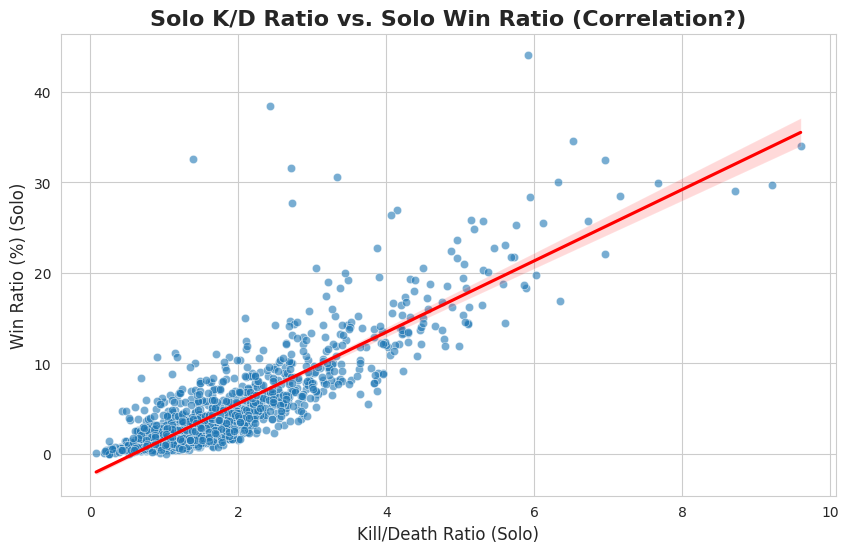

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Solo kd',
    y='Solo winRatio',
    alpha=0.6
)

sns.regplot(
    data=df,
    x='Solo kd',
    y='Solo winRatio',
    scatter=False,
    color='red'
)

plt.title('Solo K/D Ratio vs. Solo Win Ratio (Correlation?)', fontsize=16, fontweight='bold')
plt.xlabel('Kill/Death Ratio (Solo)', fontsize=12)
plt.ylabel('Win Ratio (%) (Solo)', fontsize=12)

plt.show()

**Vizualization 2**



/tmp/ipython-input-402579452.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


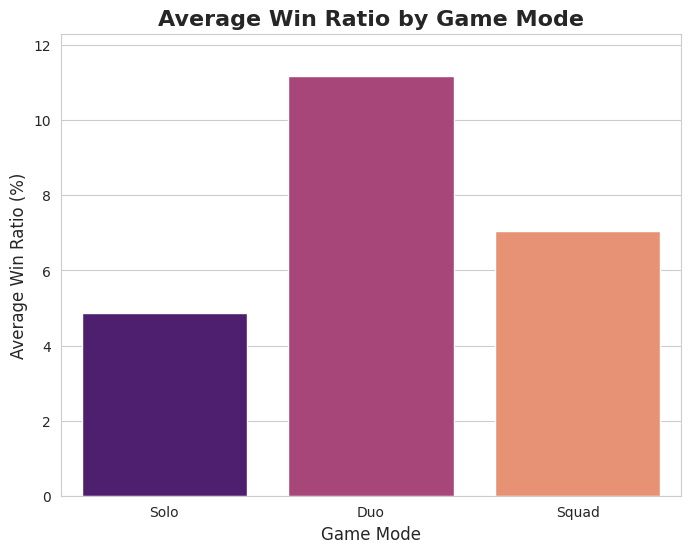

In [ ]:
avg_wins = pd.DataFrame({
    'Mode': ['Solo', 'Duo', 'Squad'],
    'Avg_WinRatio': [
        df['Solo winRatio'].mean(),
        df['Duos winRatio'].mean(),
        df['Squads winRatio'].mean()
    ]
})

plt.figure(figsize=(8, 6))

sns.barplot(
    data=avg_wins,
    x='Mode',
    y='Avg_WinRatio',
    palette='magma'
)

plt.title('Average Win Ratio by Game Mode', fontsize=16, fontweight='bold')
plt.xlabel('Game Mode', fontsize=12)
plt.ylabel('Average Win Ratio (%)', fontsize=12)
plt.ylim(0, avg_wins['Avg_WinRatio'].max() * 1.1)

plt.show()